In [1]:
import tensorflow as tf
import numpy as np
import cv2

/home/james/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Input Image

In [2]:
image_name = 'Images/bank_cheque.jpg'
image = cv2.imread(image_name,cv2.IMREAD_GRAYSCALE)
image_height, image_width = image.shape
float_image = image.astype(np.float32)/255.0
input_image = float_image.reshape((1,image_height, image_width, 1)) 

## Input - Output Tensors

In [3]:
I = tf.placeholder(shape = (1, image_height, image_width, 1), dtype = tf.float32)
# J = tf.Variable(initial_value = np.ones(shape = (1, image_height, image_width, 1), dtype=np.float32) ,
#                 dtype=tf.float32)
J = tf.get_variable(name = 'J', shape = (1, image_height, image_width, 1), dtype = (tf.float32),
               initializer = tf.contrib.layers.xavier_initializer())

In [4]:
feed_dict = {I:input_image}

In [5]:
def ler_step(sess, cost, optimizer):
    global feed_dict
    
    sess.run(tf.global_variables_initializer())
    #Opitimize
    sess.run(optimizer, feed_dict)

    #Get Cost value    
    cost_val = sess.run(cost, feed_dict)
    
    return cost_val

In [6]:
def step(sess, cost, optimizer):
    global feed_dict
    #Opitimize
    sess.run(optimizer, feed_dict)

    #Get Cost value    
    cost_val = sess.run(cost, feed_dict)
    
    return cost_val

In [7]:
def find_ler(I, cost, ler_min = 0.00001, ler_max = 100):
    local_sess = tf.Session()
    
    
    cost_vals = []
    ler_vals = []    
    ler = ler_min

    while ler < 5*ler_max:
        ler_find_optimizer = tf.train.RMSPropOptimizer(ler).minimize(cost)
        
        cost_vals.append(ler_step(local_sess, cost, ler_find_optimizer))
        ler_vals.append(ler)
        
        ler *= 5
    
    local_sess.close()
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.plot(ler_vals, cost_vals)
    plt.show()
    return ler_vals, cost_vals

## Tensors

In [8]:
# J_squished = J
J_squished = tf.nn.sigmoid(J)
# J_squished = (J - tf.reduce_min(J)) / (tf.reduce_max(J) - tf.reduce_min(J))

## Preserve local gradients

In [9]:
grad_Ix, grad_Iy = tf.image.image_gradients(I)
grad_Jx, grad_Jy = tf.image.image_gradients(J_squished)

local_grad_cost = tf.reduce_sum( tf.square(grad_Ix - grad_Jx) + tf.square(grad_Iy - grad_Jy) )

## Make background whiter

In [10]:
white_image = tf.constant(1, shape = (1, image_height, image_width, 1), dtype=tf.float32)

whiter_image_cost = tf.reduce_sum( tf.square(J_squished - white_image) )

## Add up the cost of both constraints

In [11]:
total_cost = whiter_image_cost + local_grad_cost

## Find the optimal learning rate

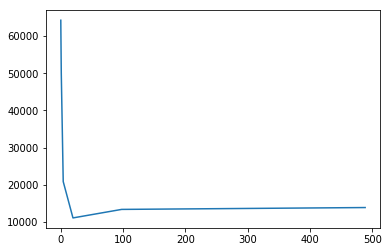

In [12]:
lers, costs = find_ler(I, total_cost)

In [13]:
lers

[1e-05,
 5e-05,
 0.00025,
 0.00125,
 0.00625,
 0.03125,
 0.15625,
 0.78125,
 3.90625,
 19.53125,
 97.65625,
 488.28125]

In [14]:
costs

[64230.73,
 64230.16,
 64226.773,
 64204.914,
 64101.61,
 63587.074,
 61067.293,
 49932.33,
 20872.395,
 11122.064,
 13409.623,
 13907.229]

## Hyper Parameters

In [15]:
learning_rate = 0.1
num_iterations = 1500

## Minimize the cost

In [16]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(total_cost)

## Put it all together and Execute

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
for i in range(num_iterations):
    cost_val = step(sess, total_cost, optimizer)
    print('i:{} cost:{}'.format(i,cost_val))

i:0 cost:62189.80078125
i:1 cost:60179.76171875
i:2 cost:58197.234375
i:3 cost:56239.28125
i:4 cost:54303.9921875
i:5 cost:52390.3671875
i:6 cost:50498.296875
i:7 cost:48628.359375
i:8 cost:46781.76171875
i:9 cost:44960.28125
i:10 cost:43166.078125
i:11 cost:41401.6484375
i:12 cost:39669.62890625
i:13 cost:37972.8671875
i:14 cost:36314.078125
i:15 cost:34696.046875
i:16 cost:33121.29296875
i:17 cost:31592.171875
i:18 cost:30110.7578125
i:19 cost:28678.8046875
i:20 cost:27297.74609375
i:21 cost:25968.65625
i:22 cost:24692.265625
i:23 cost:23468.951171875
i:24 cost:22298.7265625
i:25 cost:21181.3515625
i:26 cost:20116.21875
i:27 cost:19102.52734375
i:28 cost:18139.205078125
i:29 cost:17224.994140625
i:30 cost:16358.4873046875
i:31 cost:15538.1279296875
i:32 cost:14762.2421875
i:33 cost:14029.119140625
i:34 cost:13336.9677734375
i:35 cost:12683.984375
i:36 cost:12068.3388671875
i:37 cost:11488.2275390625
i:38 cost:10941.85546875
i:39 cost:10427.484375
i:40 cost:9943.3857421875
i:41 cost:9

i:301 cost:2022.252197265625
i:302 cost:2022.247802734375
i:303 cost:2022.248291015625
i:304 cost:2022.2388916015625
i:305 cost:2022.236083984375
i:306 cost:2022.2242431640625
i:307 cost:2022.2215576171875
i:308 cost:2022.2159423828125
i:309 cost:2022.21630859375
i:310 cost:2022.21533203125
i:311 cost:2022.2264404296875
i:312 cost:2022.237060546875
i:313 cost:2022.2459716796875
i:314 cost:2022.236572265625
i:315 cost:2022.2357177734375
i:316 cost:2022.2293701171875
i:317 cost:2022.229248046875
i:318 cost:2022.2119140625
i:319 cost:2022.20458984375
i:320 cost:2022.197265625
i:321 cost:2022.202880859375
i:322 cost:2022.2060546875
i:323 cost:2022.2159423828125
i:324 cost:2022.218505859375
i:325 cost:2022.2247314453125
i:326 cost:2022.2164306640625
i:327 cost:2022.206298828125
i:328 cost:2022.203857421875
i:329 cost:2022.203369140625
i:330 cost:2022.195068359375
i:331 cost:2022.1934814453125
i:332 cost:2022.187255859375
i:333 cost:2022.188720703125
i:334 cost:2022.180419921875
i:335 cost:2

i:587 cost:2022.150634765625
i:588 cost:2022.14404296875
i:589 cost:2022.15087890625
i:590 cost:2022.1483154296875
i:591 cost:2022.1590576171875
i:592 cost:2022.1588134765625
i:593 cost:2022.16259765625
i:594 cost:2022.1497802734375
i:595 cost:2022.141845703125
i:596 cost:2022.1298828125
i:597 cost:2022.1328125
i:598 cost:2022.1356201171875
i:599 cost:2022.143798828125
i:600 cost:2022.1416015625
i:601 cost:2022.138671875
i:602 cost:2022.1318359375
i:603 cost:2022.1407470703125
i:604 cost:2022.1513671875
i:605 cost:2022.171142578125
i:606 cost:2022.1719970703125
i:607 cost:2022.17041015625
i:608 cost:2022.15625
i:609 cost:2022.1494140625
i:610 cost:2022.1318359375
i:611 cost:2022.1275634765625
i:612 cost:2022.124755859375
i:613 cost:2022.142822265625
i:614 cost:2022.1451416015625
i:615 cost:2022.1497802734375
i:616 cost:2022.145263671875
i:617 cost:2022.15283203125
i:618 cost:2022.155029296875
i:619 cost:2022.161865234375
i:620 cost:2022.1539306640625
i:621 cost:2022.14990234375
i:622 c

i:874 cost:2022.140625
i:875 cost:2022.1600341796875
i:876 cost:2022.1688232421875
i:877 cost:2022.1790771484375
i:878 cost:2022.1644287109375
i:879 cost:2022.146728515625
i:880 cost:2022.125244140625
i:881 cost:2022.1192626953125
i:882 cost:2022.1141357421875
i:883 cost:2022.122802734375
i:884 cost:2022.126708984375
i:885 cost:2022.139404296875
i:886 cost:2022.14013671875
i:887 cost:2022.150390625
i:888 cost:2022.149169921875
i:889 cost:2022.15380859375
i:890 cost:2022.1451416015625
i:891 cost:2022.146240234375
i:892 cost:2022.1380615234375
i:893 cost:2022.1414794921875
i:894 cost:2022.13525390625
i:895 cost:2022.139404296875
i:896 cost:2022.13720703125
i:897 cost:2022.1419677734375
i:898 cost:2022.1376953125
i:899 cost:2022.1444091796875
i:900 cost:2022.145751953125
i:901 cost:2022.1514892578125
i:902 cost:2022.13916015625
i:903 cost:2022.137939453125
i:904 cost:2022.131103515625
i:905 cost:2022.1358642578125
i:906 cost:2022.134521484375
i:907 cost:2022.1422119140625
i:908 cost:2022.

i:1160 cost:2022.143798828125
i:1161 cost:2022.1363525390625
i:1162 cost:2022.1163330078125
i:1163 cost:2022.11572265625
i:1164 cost:2022.118896484375
i:1165 cost:2022.137939453125
i:1166 cost:2022.1427001953125
i:1167 cost:2022.1556396484375
i:1168 cost:2022.15283203125
i:1169 cost:2022.15234375
i:1170 cost:2022.1424560546875
i:1171 cost:2022.1453857421875
i:1172 cost:2022.14013671875
i:1173 cost:2022.135498046875
i:1174 cost:2022.126953125
i:1175 cost:2022.13330078125
i:1176 cost:2022.135986328125
i:1177 cost:2022.138427734375
i:1178 cost:2022.131103515625
i:1179 cost:2022.1298828125
i:1180 cost:2022.126708984375
i:1181 cost:2022.14013671875
i:1182 cost:2022.140625
i:1183 cost:2022.1510009765625
i:1184 cost:2022.144775390625
i:1185 cost:2022.1480712890625
i:1186 cost:2022.1402587890625
i:1187 cost:2022.1448974609375
i:1188 cost:2022.1436767578125
i:1189 cost:2022.1463623046875
i:1190 cost:2022.1407470703125
i:1191 cost:2022.1407470703125
i:1192 cost:2022.137939453125
i:1193 cost:2022

i:1440 cost:2022.1531982421875
i:1441 cost:2022.14453125
i:1442 cost:2022.1278076171875
i:1443 cost:2022.127685546875
i:1444 cost:2022.125
i:1445 cost:2022.126953125
i:1446 cost:2022.123779296875
i:1447 cost:2022.1395263671875
i:1448 cost:2022.14599609375
i:1449 cost:2022.15625
i:1450 cost:2022.1468505859375
i:1451 cost:2022.1485595703125
i:1452 cost:2022.1376953125
i:1453 cost:2022.135498046875
i:1454 cost:2022.1201171875
i:1455 cost:2022.1236572265625
i:1456 cost:2022.125244140625
i:1457 cost:2022.13671875
i:1458 cost:2022.130859375
i:1459 cost:2022.1387939453125
i:1460 cost:2022.1385498046875
i:1461 cost:2022.142822265625
i:1462 cost:2022.1417236328125
i:1463 cost:2022.154052734375
i:1464 cost:2022.1502685546875
i:1465 cost:2022.144287109375
i:1466 cost:2022.130126953125
i:1467 cost:2022.134521484375
i:1468 cost:2022.1298828125
i:1469 cost:2022.1416015625
i:1470 cost:2022.135986328125
i:1471 cost:2022.134765625
i:1472 cost:2022.12060546875
i:1473 cost:2022.1212158203125
i:1474 cost:

In [19]:
output_image = sess.run(J_squished, feed_dict = {I:input_image})
sess.close()

## Post process the output

In [20]:
# output_image = (output_image - np.min(output_image)) / (np.max(output_image) - np.min(output_image))

In [21]:
print('Pixel range:{} to {}'.format(output_image.min(), output_image.max()))

Pixel range:0.1917707473039627 to 1.0


## Store Output Image

In [22]:
output_image = output_image * 255
output_image = output_image.astype(np.uint8)
output_image = output_image.squeeze()
cv2.imwrite('result.jpg', output_image)

True